In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras import models, layers

# load the dataset
df = pd.read_csv('house_data.csv')

In [3]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bathrooms      21613 non-null  float64
 1   bedrooms       21613 non-null  float64
 2   condition      21613 non-null  float64
 3   date           0 non-null      object 
 4   floors         21613 non-null  float64
 5   grade          21613 non-null  float64
 6   id             21613 non-null  float64
 7   lat            21613 non-null  float64
 8   long           21613 non-null  float64
 9   price          21613 non-null  float64
 10  sqft_above     21611 non-null  float64
 11  sqft_basement  21613 non-null  float64
 12  sqft_living    21613 non-null  float64
 13  sqft_living15  21613 non-null  float64
 14  sqft_lot       21613 non-null  float64
 15  sqft_lot15     21613 non-null  float64
 16  view           21613 non-null  float64
 17  waterfront     21613 non-null  float64
 18  yr_bui

In [4]:
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7      1180.0              0   
1      7242     2.0           0     0  ...      7      2170.0            400   
2     10000     1.0           0     0  ...      6       770.0              0   
3      5000     1.0           0     0  ...      7      1050.0            910   
4      8080     1.0           0     0  ...      8      1680.0              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [5]:
# normalize the data
# a bit crude, but as long as we don't pick "nuisance" columns will be fine
df = (df - df.mean()) / df.std()

C:\Users\aiden\AppData\Local\Temp/ipykernel_4980/291779629.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = (df - df.mean()) / df.std()


In [6]:
df.head()

bathrooms  bedrooms  condition date    floors     grade        id  \
0  -1.447430 -0.398728  -0.629172  NaN -0.915406 -0.558823  0.886126   
1   0.175603 -0.398728  -0.629172  NaN  0.936484 -0.558823  0.637496   
2  -1.447430 -1.473925  -0.629172  NaN -0.915406 -1.409554  0.365435   
3   1.149422  0.676469   2.444237  NaN -0.915406 -0.558823 -0.727639   
4  -0.149004 -0.398728  -0.629172  NaN -0.915406  0.291909 -0.912860   

        lat      long     price  ...  sqft_basement  sqft_living  \
0 -0.352564 -0.306072 -0.866697  ...      -0.658666    -0.979812   
1  1.161541 -0.746324 -0.005688  ...       0.245136     0.533622   
2  1.283507 -0.135652 -0.980827  ...      -0.658666    -1.426221   
3 -0.283281 -1.271787  0.174086  ...       1.397483    -0.130547   
4  0.409541  1.199307 -0.081956  ...      -0.658666    -0.435412   

   sqft_living15  sqft_lot  sqft_lot15      view  waterfront  yr_built  \
0      -0.943333 -0.228316   -0.260709 -0.305752   -0.087171 -0.544885   
1      -0.432676 -0.189881   -0.187863 -0.305752   -0.087171 -0.681063   
2       1.070115 -0.123296   -0.172371 -0.305752   -0.087171 -1.293862   
3      -0.914153 -0.244009   -0.284515 -0.305752   -0.087171 -0.204441   
4      -0.272184 -0.169649   -0.192844 -0.305752   -0.087171  0.544535   

   yr_renovated   zipcode  
0     -0.210124  1.870108  
1      4.746568  0.879547  
2     -0.210124 -0.933367  
3     -0.210124  1.085135  
4     -0.210124 -0.073634  

[5 rows x 21 columns]

array([[<AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'floors'}>],
       [<AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>,
        <AxesSubplot:title={'center':'view'}>],
       [<AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'

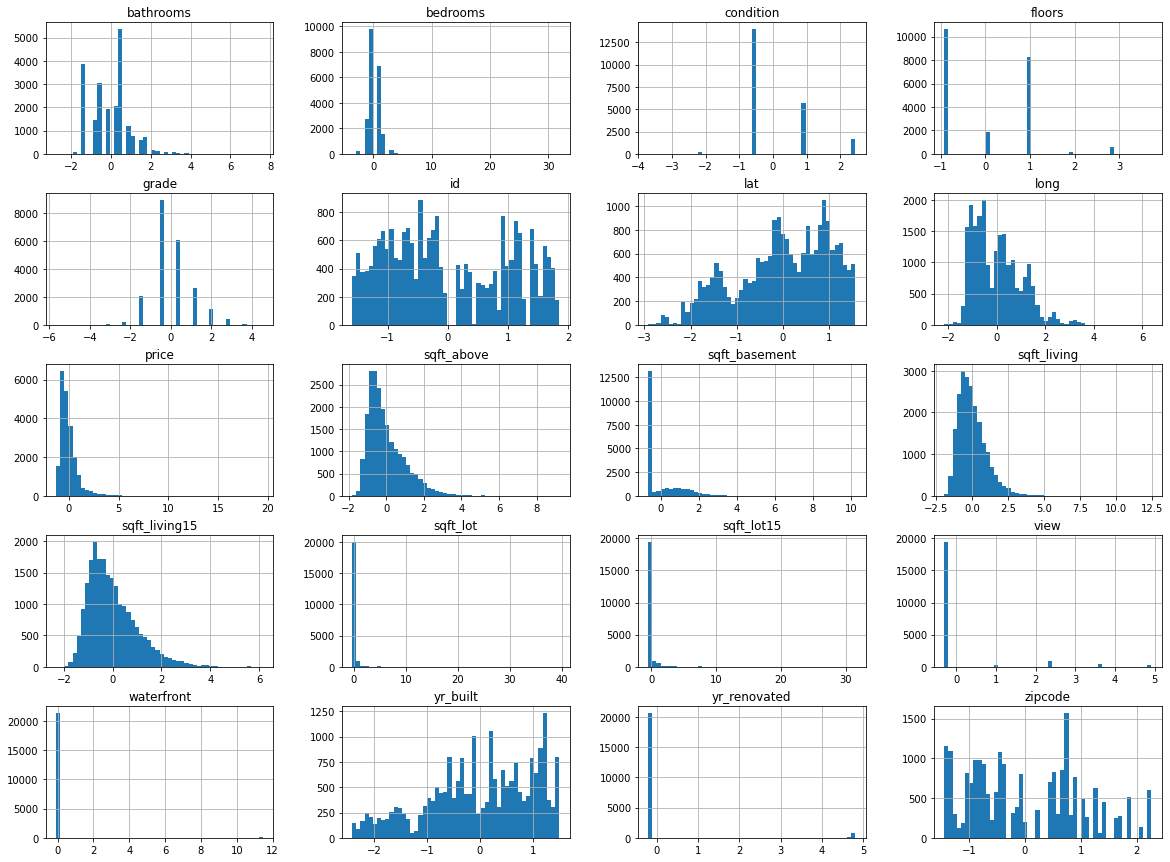

In [7]:
# Make histograms of the data
df.hist(bins=50, figsize=(20,15))

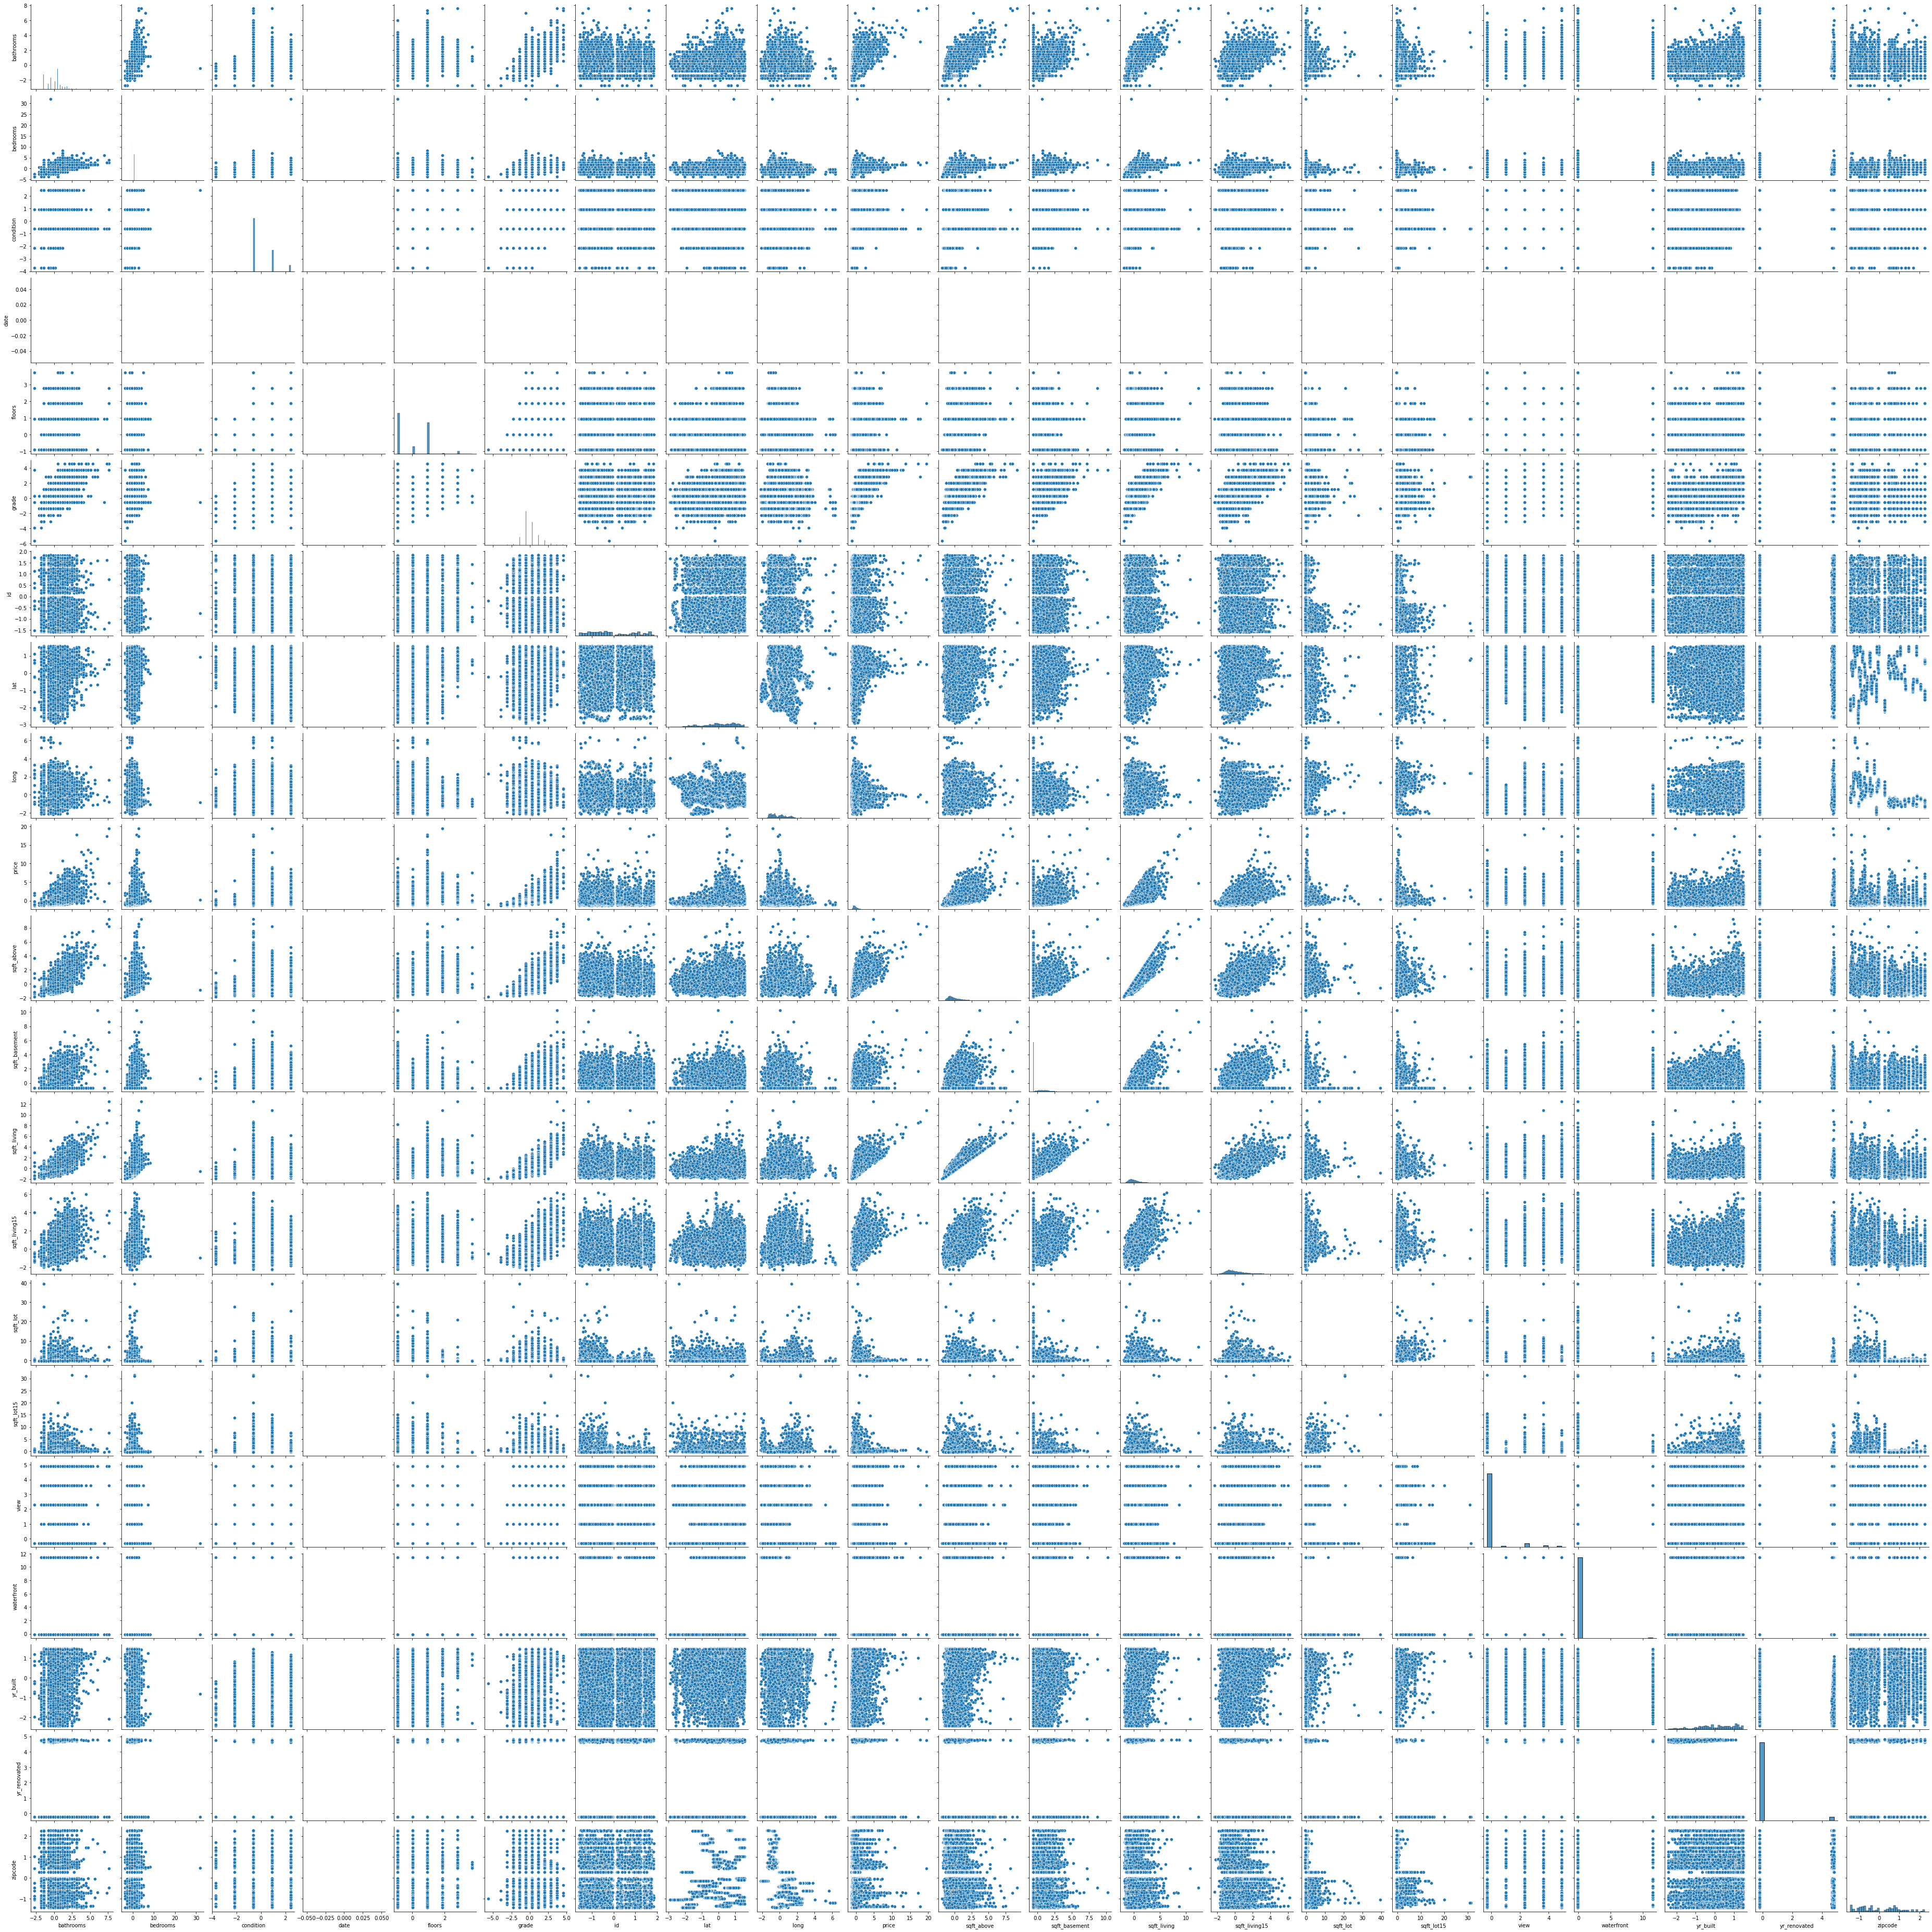

In [47]:
# Making a seaborn pairplot
import seaborn as sns

sns.pairplot(df)

In [8]:
# split the dataset into training and testing sets

# start with two input features
train_data, test_data, train_targets, test_targets = train_test_split(df[['sqft_living15','condition']], df[['price']], test_size=0.2)

In [25]:
# define a neural network with one hidden layer
model = models.Sequential()

# study these hyperparameters and experiment!
# try out different activation functions in particular
# change input_shape to match number of input variables

# model.add(layers.Dense(64, activation='relu', input_shape=(2,))) 
# model.add(layers.Dense(64, activation='sigmoid', input_shape=(2,)))
model.add(layers.Dense(64, activation='elu', input_shape=(2,)))

# only one layer
# figure out how to add more

# Hidden layers
model.add(layers.Dense(32, activation='elu'))
model.add(layers.Dense(32, activation='elu'))

# Output layer
model.add(layers.Dense(1))

# compile the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [26]:
# train the model
history = model.fit(train_data, train_targets, epochs=100)

Epoch 1/100
541/541 [==============================] - 1s 2ms/step - loss: 0.6399 - mae: 0.5013
Epoch 2/100
541/541 [==============================] - 1s 2ms/step - loss: 0.6274 - mae: 0.4931
Epoch 3/100
541/541 [==============================] - 1s 2ms/step - loss: 0.6230 - mae: 0.4905
Epoch 4/100
541/541 [==============================] - 1s 2ms/step - loss: 0.6207 - mae: 0.4896
Epoch 5/100
541/541 [==============================] - 1s 2ms/step - loss: 0.6199 - mae: 0.4868
Epoch 6/100
541/541 [==============================] - 1s 2ms/step - loss: 0.6192 - mae: 0.4875
Epoch 7/100
541/541 [==============================] - 1s 2ms/step - loss: 0.6192 - mae: 0.4884
Epoch 8/100
541/541 [==============================] - 1s 3ms/step - loss: 0.6185 - mae: 0.4878
Epoch 9/100
541/541 [==============================] - 2s 3ms/step - loss: 0.6181 - mae: 0.4867
Epoch 10/100
541/541 [==============================] - 1s 2ms/step - loss: 0.6159 - mae: 0.4872
Epoch 11/100
541/541 [=================

In [34]:
# evaluate the performance of the model
test_loss, test_mae = model.evaluate(test_data, test_targets)

136/136 [==============================] - 0s 1ms/step - loss: 0.6012 - mae: 0.4674


In [21]:
# Looping through activation functions

# activations = ['relu', 'sigmoid', 'tanh', 'linear', 'softmax', 'softplus', 'softsign', 'hard_sigmoid', 'exponential', 'selu', 'elu', 'gelu', 'swish', 'softsign', 'softplus', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']

# for act in activations:
#     # define a neural network with one hidden layer
#     model = models.Sequential()

#     # study these hyperparameters and experiment!
#     # try out different activation functions in particular
#     # change input_shape to match number of input variables

#     model.add(layers.Dense(64, activation=act, input_shape=(2,)))

#     # only one layer
#     # figure out how to add more
#     model.add(layers.Dense(1))

#     # Compiling the model without showing epoch progress
#     model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

#     # train the model
#     model.fit(train_data, train_targets, epochs=100, verbose=0)

#     # evaluate the performance of the model
#     print("Activation function: ", act)
#     test_loss, test_mae = model.evaluate(test_data, test_targets)

In [28]:
# Graphing the neural network

from ann_visualizer.visualize import ann_viz

ann_viz(model, title="House Data Neural Network", view=True)

# Performances

## Manually

**Initial:**

    MAE: 0.5052
    Input layer: 2 inputs 64 neurons
    Number of hidden layers: 1
    Number of neurons: 64
    Number of epochs: 100
    Activation function: relu
    Optimizer: rmsprop

**Alteration 1:**

- MAE: 0.4830
- Input layer: 2 inputs 64 neurons
- Number of hidden layers: 1
- Number of neurons: **128**
- Number of epochs: 100
- Activation function: relu
- Optimizer: rmsprop

**Alteration 2:**

- MAE: 0.4830
- Input layer: 2 inputs 64 neurons
- Number of hidden layers: 1
- Number of neurons: 64
- Number of epochs: 100
- Activation function: **sigmoid**
- Optimizer: rmsprop

\*\* Going to try to loop through the activation functions and see which one is the best. See results in the next section.

**Alteration 3:**

- MAE: 0.4635
- Input layer: 2 inputs 64 neurons
- Number of hidden layers: 1
- Number of neurons: 64
- Number of epochs: 100
- Activation function: **elu** <-- Result of the loop
- Optimizer: rmsprop

**Alteration 4:**

- MAE: 0.4725
- Input layer: 2 inputs 64 neurons
- Number of hidden layers: 1
- Number of neurons: 64
- Number of epochs: **1000**
- Activation function: **elu**
- Optimizer: rmsprop

**Alteration 5:**

- MAE: 0.4674
- Input layer: 2 inputs 64 neurons
- Number of hidden layers: **3**
- each layer has **32 neurons**
- Number of epochs: 100
- Activation function: **elu**
- Optimizer: rmsprop

## Looping

### Looping on different activation functions

```` text
Activation function:  relu
136/136 [==============================] - 0s 1ms/step - loss: 0.5985 - mae: 0.4707

Activation function:  sigmoid
136/136 [==============================] - 0s 1ms/step - loss: 0.6143 - mae: 0.4658

Activation function:  tanh
136/136 [==============================] - 0s 1ms/step - loss: 0.6052 - mae: 0.4878

Activation function:  linear
136/136 [==============================] - 0s 1ms/step - loss: 0.6552 - mae: 0.4899

Activation function:  softmax
136/136 [==============================] - 0s 1ms/step - loss: 0.5956 - mae: 0.4723

Activation function:  softplus
136/136 [==============================] - 0s 1ms/step - loss: 0.6168 - mae: 0.4678

Activation function:  softsign
136/136 [==============================] - 0s 1ms/step - loss: 0.6046 - mae: 0.4694

Activation function:  hard_sigmoid
136/136 [==============================] - 0s 1ms/step - loss: 0.6595 - mae: 0.5109

Activation function:  exponential
136/136 [==============================] - 0s 1ms/step - loss: 0.6057 - mae: 0.4903

Activation function:  selu
136/136 [==============================] - 0s 1ms/step - loss: 0.6051 - mae: 0.4653

Activation function:  elu
136/136 [==============================] - 0s 1ms/step - loss: 0.6096 - mae: 0.4635

Activation function:  gelu
136/136 [==============================] - 0s 1ms/step - loss: 0.6029 - mae: 0.4696

Activation function:  swish
136/136 [==============================] - 0s 1ms/step - loss: 0.6029 - mae: 0.4674

Activation function:  softsign
136/136 [==============================] - 0s 1ms/step - loss: 0.6003 - mae: 0.4743

Activation function:  softplus
136/136 [==============================] - 0s 1ms/step - loss: 0.6120 - mae: 0.4744

Activation function:  tanh
136/136 [==============================] - 0s 1ms/step - loss: 0.6037 - mae: 0.4808

Activation function:  sigmoid
136/136 [==============================] - 0s 1ms/step - loss: 0.6077 - mae: 0.4780

Activation function:  hard_sigmoid
136/136 [==============================] - 0s 1ms/step - loss: 0.6593 - mae: 0.5130

Activation function:  linear
136/136 [==============================] - 0s 1ms/step - loss: 0.6588 - mae: 0.4859
````

**Elu seems to be the best activation function with a MAE of 0.4635.**

It doesn't seem like I can get the MAE any higher with the given input features, let's try to add more features.

# Trying new features

In [57]:
y = df['price']

X = df[['bathrooms', 'sqft_living15', 'condition', 'floors', 'yr_built', 'yr_renovated', 'zipcode']]

# split the dataset into training and testing sets
train_data, test_data, train_targets, test_targets = train_test_split(X, y, test_size=0.2, random_state=42)

# define a neural network
model = models.Sequential()

# Input layer
model.add(layers.Dense(64, activation='elu', input_shape=(7,)))

# Add hidden layers
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))

# Output layer
model.add(layers.Dense(1))

# compile the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# train the model
history = model.fit(train_data, train_targets, epochs=100)

# evaluate the performance of the model
print('\nAccuracy of the model on the test data:')
test_loss, test_mae = model.evaluate(test_data, test_targets)

Epoch 1/100
541/541 [==============================] - 2s 3ms/step - loss: 0.4413 - mae: 0.4134
Epoch 2/100
541/541 [==============================] - 1s 2ms/step - loss: 0.4089 - mae: 0.4000
Epoch 3/100
541/541 [==============================] - 1s 2ms/step - loss: 0.3962 - mae: 0.3945
Epoch 4/100
541/541 [==============================] - 1s 2ms/step - loss: 0.3953 - mae: 0.3917
Epoch 5/100
541/541 [==============================] - 1s 2ms/step - loss: 0.3927 - mae: 0.3890
Epoch 6/100
541/541 [==============================] - 1s 2ms/step - loss: 0.3851 - mae: 0.3880
Epoch 7/100
541/541 [==============================] - 1s 2ms/step - loss: 0.3870 - mae: 0.3852
Epoch 8/100
541/541 [==============================] - 1s 3ms/step - loss: 0.3816 - mae: 0.3850
Epoch 9/100
541/541 [==============================] - 1s 2ms/step - loss: 0.3755 - mae: 0.3835
Epoch 10/100
541/541 [==============================] - 1s 3ms/step - loss: 0.3748 - mae: 0.3821
Epoch 11/100
541/541 [=================

This is the lowest MAE so far, 0.4132. Lets see if adding more hidden layers and neurons will improve the MAE.

In [58]:
y = df['price']

X = df[['bathrooms', 'sqft_living15', 'condition', 'floors', 'yr_built', 'yr_renovated', 'zipcode']]

# split the dataset into training and testing sets
train_data, test_data, train_targets, test_targets = train_test_split(X, y, test_size=0.2, random_state=42)

# define a neural network
model = models.Sequential()

# Input layer
model.add(layers.Dense(64, activation='elu', input_shape=(7,)))

# Add hidden layers
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))

# Output layer
model.add(layers.Dense(1))

# compile the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# train the model
history = model.fit(train_data, train_targets, epochs=100)

# evaluate the performance of the model
print('\nAccuracy of the model on the test data:')
test_loss, test_mae = model.evaluate(test_data, test_targets)

Epoch 1/100
541/541 [==============================] - 2s 3ms/step - loss: 0.4566 - mae: 0.4183
Epoch 2/100
541/541 [==============================] - 1s 2ms/step - loss: 0.4106 - mae: 0.4017
Epoch 3/100
541/541 [==============================] - 1s 2ms/step - loss: 0.4050 - mae: 0.3977
Epoch 4/100
541/541 [==============================] - 1s 2ms/step - loss: 0.3963 - mae: 0.3916
Epoch 5/100
541/541 [==============================] - 1s 2ms/step - loss: 0.3899 - mae: 0.3893
Epoch 6/100
541/541 [==============================] - 1s 2ms/step - loss: 0.3829 - mae: 0.3859
Epoch 7/100
541/541 [==============================] - 1s 2ms/step - loss: 0.3758 - mae: 0.3844
Epoch 8/100
541/541 [==============================] - 1s 2ms/step - loss: 0.3791 - mae: 0.3822
Epoch 9/100
541/541 [==============================] - 1s 2ms/step - loss: 0.3758 - mae: 0.3812
Epoch 10/100
541/541 [==============================] - 1s 2ms/step - loss: 0.3700 - mae: 0.3781
Epoch 11/100
541/541 [=================

It helped a little bit, but not much. The MAE is now 0.4008. Maybe changing the neurons will help.

In [59]:
y = df['price']

X = df[['bathrooms', 'sqft_living15', 'condition', 'floors', 'yr_built', 'yr_renovated', 'zipcode']]

# split the dataset into training and testing sets
train_data, test_data, train_targets, test_targets = train_test_split(X, y, test_size=0.2, random_state=42)

# define a neural network
model = models.Sequential()

# Input layer
model.add(layers.Dense(96, activation='elu', input_shape=(7,)))

# Add hidden layers
model.add(layers.Dense(48, activation='relu'))
model.add(layers.Dense(48, activation='relu'))
model.add(layers.Dense(48, activation='relu'))

# Output layer
model.add(layers.Dense(1))

# compile the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# train the model
history = model.fit(train_data, train_targets, epochs=100)

# evaluate the performance of the model
print('\nAccuracy of the model on the test data:')
test_loss, test_mae = model.evaluate(test_data, test_targets)

Epoch 1/100
541/541 [==============================] - 2s 3ms/step - loss: 0.4470 - mae: 0.4145
Epoch 2/100
541/541 [==============================] - 1s 2ms/step - loss: 0.4203 - mae: 0.3997
Epoch 3/100
541/541 [==============================] - 1s 2ms/step - loss: 0.4057 - mae: 0.3946
Epoch 4/100
541/541 [==============================] - 1s 2ms/step - loss: 0.4007 - mae: 0.3903
Epoch 5/100
541/541 [==============================] - 1s 2ms/step - loss: 0.3921 - mae: 0.3881
Epoch 6/100
541/541 [==============================] - 1s 2ms/step - loss: 0.3875 - mae: 0.3870
Epoch 7/100
541/541 [==============================] - 1s 2ms/step - loss: 0.3842 - mae: 0.3838
Epoch 8/100
541/541 [==============================] - 1s 2ms/step - loss: 0.3779 - mae: 0.3832
Epoch 9/100
541/541 [==============================] - 1s 2ms/step - loss: 0.3794 - mae: 0.3808
Epoch 10/100
541/541 [==============================] - 1s 2ms/step - loss: 0.3758 - mae: 0.3799
Epoch 11/100
541/541 [=================

In [79]:
# Printing what the neural network looks like

from ann_visualizer.visualize import ann_viz

ann_viz(model, title="House Data Neural Network", view=True)

In [78]:
model.summary()

Model: "sequential_61"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_189 (Dense)           (None, 96)                768       
                                                                 
 dense_190 (Dense)           (None, 48)                4656      
                                                                 
 dense_191 (Dense)           (None, 48)                2352      
                                                                 
 dense_192 (Dense)           (None, 48)                2352      
                                                                 
 dense_193 (Dense)           (None, 1)                 49        
                                                                 
Total params: 10,177
Trainable params: 10,177
Non-trainable params: 0
_________________________________________________________________


Again, not much of an improvement. The MAE is now 0.3996. Maybe changing the number of epochs will help.

In [60]:
y = df['price']

X = df[['bathrooms', 'sqft_living15', 'condition', 'floors', 'yr_built', 'yr_renovated', 'zipcode']]

# split the dataset into training and testing sets
train_data, test_data, train_targets, test_targets = train_test_split(X, y, test_size=0.2, random_state=42)

# define a neural network
model = models.Sequential()

# Input layer
model.add(layers.Dense(96, activation='elu', input_shape=(7,)))

# Add hidden layers
model.add(layers.Dense(48, activation='relu'))
model.add(layers.Dense(48, activation='relu'))
model.add(layers.Dense(48, activation='relu'))

# Output layer
model.add(layers.Dense(1))

# compile the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# train the model
history = model.fit(train_data, train_targets, epochs=150)

# evaluate the performance of the model
print('\nAccuracy of the model on the test data:')
test_loss, test_mae = model.evaluate(test_data, test_targets)

Epoch 1/150
541/541 [==============================] - 2s 2ms/step - loss: 0.4464 - mae: 0.4143
Epoch 2/150
541/541 [==============================] - 1s 2ms/step - loss: 0.4138 - mae: 0.3975
Epoch 3/150
541/541 [==============================] - 1s 2ms/step - loss: 0.4026 - mae: 0.3942
Epoch 4/150
541/541 [==============================] - 1s 2ms/step - loss: 0.3988 - mae: 0.3910
Epoch 5/150
541/541 [==============================] - 1s 2ms/step - loss: 0.3887 - mae: 0.3887
Epoch 6/150
541/541 [==============================] - 1s 2ms/step - loss: 0.3829 - mae: 0.3844
Epoch 7/150
541/541 [==============================] - 1s 2ms/step - loss: 0.3838 - mae: 0.3839
Epoch 8/150
541/541 [==============================] - 1s 2ms/step - loss: 0.3741 - mae: 0.3812
Epoch 9/150
541/541 [==============================] - 1s 2ms/step - loss: 0.3690 - mae: 0.3814
Epoch 10/150
541/541 [==============================] - 1s 2ms/step - loss: 0.3723 - mae: 0.3791
Epoch 11/150
541/541 [=================

We actually got a worse MAE, 0.4257. Maybe changing the optimizer will help. I will go back to the original number of epochs and loop through the optimizers.

In [61]:
y = df['price']

X = df[['bathrooms', 'sqft_living15', 'condition', 'floors', 'yr_built', 'yr_renovated', 'zipcode']]

# split the dataset into training and testing sets
train_data, test_data, train_targets, test_targets = train_test_split(X, y, test_size=0.2, random_state=42)

optimizers = ['rmsprop', 'adam', 'sgd']

for opt in optimizers:
    # define a neural network
    model = models.Sequential()

    # Input layer
    model.add(layers.Dense(96, activation='elu', input_shape=(7,)))

    # Add hidden layers
    model.add(layers.Dense(48, activation='relu'))
    model.add(layers.Dense(48, activation='relu'))
    model.add(layers.Dense(48, activation='relu'))

    # Output layer
    model.add(layers.Dense(1))

    # compile the model
    model.compile(optimizer=opt, loss='mse', metrics=['mae'])

    # train the model
    history = model.fit(train_data, train_targets, epochs=100, verbose=0) # verbose=0 to avoid printing the training process

    # evaluate the performance of the model
    print('\nAccuracy with optimizer', opt, 'on the test data:')
    test_loss, test_mae = model.evaluate(test_data, test_targets)


Accuracy with optimizer rmsprop on the test data:
136/136 [==============================] - 0s 1ms/step - loss: 0.4997 - mae: 0.4048

Accuracy with optimizer adam on the test data:
136/136 [==============================] - 1s 2ms/step - loss: 0.4852 - mae: 0.4096

Accuracy with optimizer sgd on the test data:
136/136 [==============================] - 0s 2ms/step - loss: 0.5163 - mae: 0.4148


Changing didn't really have an effect on the MAE.

For the sake of this lab and because I time constraints I may have to stop here.

# Conclusion

This lab I tried numerous techniques of lowering the MAE score. Some of my steps include:

- Looping through different activation functions to see which one is the best
- Adding more hidden layers
- Trying different amounts of neurons
- Switching the input features
- Looping through different optimizers to see which one is the best
- Trying different amounts of epochs

I have that I got the lowest MAE with the following conditions:

- Model inputs: 
  - 'bathrooms'
  - 'sqft_living15'
  - 'condition'
  - 'floors'
  - 'yr_built'
  - 'yr_renovated'
  - 'zipcode'
- Initial Layer: 96 neurons with activation function elu
- 3 Hidden Layers: 64 neurons each with activation function relu
- Optimizer: rmsprop
- Number of epochs: 100

This combination of hyperparameters gave me a **MAE of 0.3996**. I think that this is a good score, but I would like to try to get it lower. I think that I could get it lower if I had more time to work on this lab. I would try to add more features and try to loop through more activation functions and optimizers.